In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from numpy.fft import fft

In [2]:
N = 5000
x_r, fm = sf.read('so_2KHz.wav')
Tm = 1 / fm
L = len(x_r)

In [3]:
X_r = fft(x_r, N)
X_r_abs = np.abs(X_r)
f_0_index = np.argmax(X_r_abs[1:]) + 1    # Trobem l'index de la freq. amb més presència (Obviem la freq. 0 i sumem 1 per compensar)
f_0 = (f_0_index / N) * fm                # Calculem la freq. segons la fm                        
fx = f_0

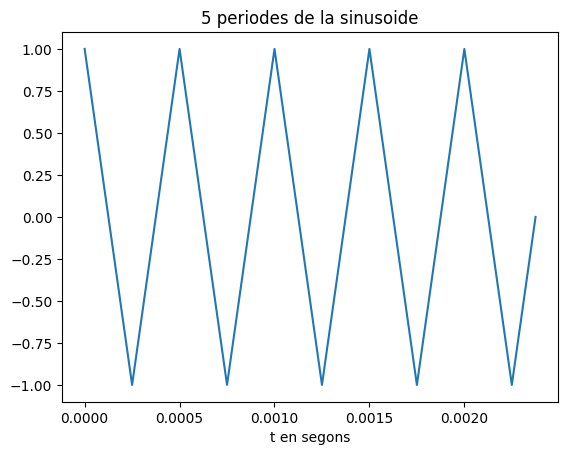

In [4]:
Tx = 1/fx
t = Tm * np.arange(L)                     # Període del senyal
Ls = int(fm * 5 * Tx)                     # Nombre de mostres corresponents a 5 períodes de la sinusoide

plt.figure(0)                             # Nova figura
plt.plot(t[0:Ls], x_r[0:Ls])              # Representació del senyal en funció del temps
plt.xlabel('t en segons')                 # Etiqueta eix temporal
plt.title('5 periodes de la sinusoide')   # Títol del gràfic
plt.show() 

In [5]:
X = fft(x_r[0 : Ls], N)               # Càlcul de la transformada de 5 períodes de la sinusoide
X_half = X[0:N//2]                         # El operador // assegura que el resultat es enter

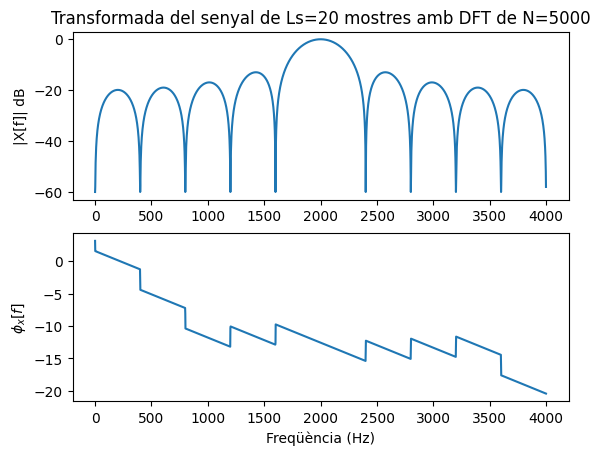

In [6]:
k = np.arange(N/2)                    # Vector amb els valors 0≤  k<N/2
freq_axis = k * (fm / N)
epsilon = 1e-20                       # Aquest petit valor evitarà la operació log(0) per a coefficients de valor 0
dBs = 20 * np.log10(abs(X_half+epsilon) / max(abs(X_half+epsilon)))
dB_min = -60
dBs = np.maximum(dBs, dB_min)

plt.figure(1)                         # Nova figura
plt.subplot(211)                      # Espai per representar el mòdul
plt.plot(freq_axis, dBs)              # Representació del mòdul de la transformada
plt.title(f'Transformada del senyal de Ls={Ls} mostres amb DFT de N={N}')   # Etiqueta del títol
plt.ylabel('|X[f]| dB')                  # Etiqueta de mòdul
plt.subplot(212)                      # Espai per representar la fase
plt.plot(freq_axis,np.unwrap(np.angle(X_half)))    # Representació de la fase de la transformad, desenroscada
plt.xlabel('Freqüència (Hz)')                 # Etiqueta de l'eix d'abscisses 
plt.ylabel('$\phi_x[f]$')             # Etiqueta de la fase en Latex
plt.show()